# Review Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('F:\ML Project\IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# Remove the last 45,000 rows
df = df[:-45000]


In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [7]:
df.rename(columns={'review':'text','sentiment':'target'},inplace=True)

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\2071127474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'review':'text','sentiment':'target'},inplace=True)


In [8]:
df

,text,target
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [9]:
#checking null values
df.isnull().sum()

text      0
target    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])
df

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\2452819824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


,text,target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
4995,An interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,1
4997,Once again Jet Li brings his charismatic prese...,1
4998,"I rented this movie, after hearing Chris Gore ...",0


In [12]:
#checking duplicates values and removing it
df.duplicated().sum()

3

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df

,text,target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
4995,An interesting slasher film with multiple susp...,0
4996,i watched this series when it first came out i...,1
4997,Once again Jet Li brings his charismatic prese...,1
4998,"I rented this movie, after hearing Chris Gore ...",0


## 2.Exploratory Data Analysis

In [15]:
df['target'].value_counts()

0    2531
1    2466
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x240c8fb2e50>,
 [Text(-0.022474232007351574, 1.0997703891702484, 'Positive review'),
  Text(0.02247412903941659, -1.0997703912744332, 'Negative review')],
 [Text(-0.012258672004009949, 0.5998747577292264, '50.65'),
  Text(0.012258615839681774, -0.5998747588769635, '49.35')])

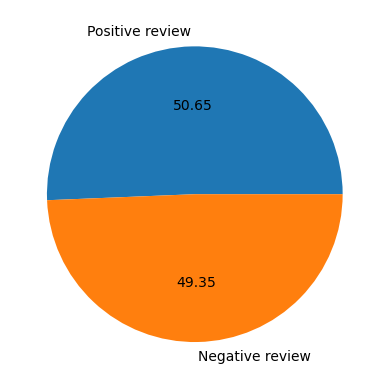

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Positive review','Negative review'],autopct="%0.2f")

In [17]:
!pip install nltk 
import nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#finding total characters
df['total_char']=df['text'].apply(len)

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\3205013250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_char']=df['text'].apply(len)


In [20]:
#finding total words
df['total_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\3067417827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
#finding total sentence
df['total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\894478764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,text,target,total_char,total_words,total_sentence
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9
...,...,...,...,...,...
4995,An interesting slasher film with multiple susp...,0,689,161,4
4996,i watched this series when it first came out i...,1,1862,366,2
4997,Once again Jet Li brings his charismatic prese...,1,1457,287,10
4998,"I rented this movie, after hearing Chris Gore ...",0,3424,720,31


In [22]:
#positive movie review
df[df['target']==1][['total_char','total_words','total_sentence']].describe()

,total_char,total_words,total_sentence
count,2466.000000,2466.000000,2466.000000
mean,1310.942011,277.177616,10.169505
std,1020.481188,212.271853,7.148984
min,139.000000,29.000000,1.000000
25%,683.250000,148.000000,6.000000
50%,961.500000,206.000000,8.000000
75%,1620.000000,344.750000,12.750000
max,9951.000000,2113.000000,75.000000


In [23]:
#negative movie review
df[df['target']==0][['total_char','total_words','total_sentence']].describe()

,total_char,total_words,total_sentence
count,2531.000000,2531.000000,2531.000000
mean,1309.854208,282.118925,11.037535
std,949.089982,203.208074,7.765319
min,80.000000,18.000000,1.000000
25%,711.500000,154.000000,6.000000
50%,969.000000,210.000000,9.000000
75%,1613.000000,345.000000,14.000000
max,6230.000000,1294.000000,62.000000


In [24]:
import seaborn as sns

<Axes: xlabel='total_char', ylabel='Count'>

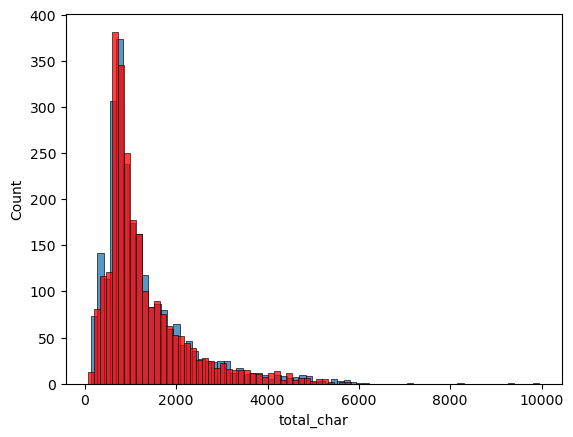

In [25]:
sns.histplot(df[df['target']==1]['total_char'])
sns.histplot(df[df['target']==0]['total_char'],color='red')

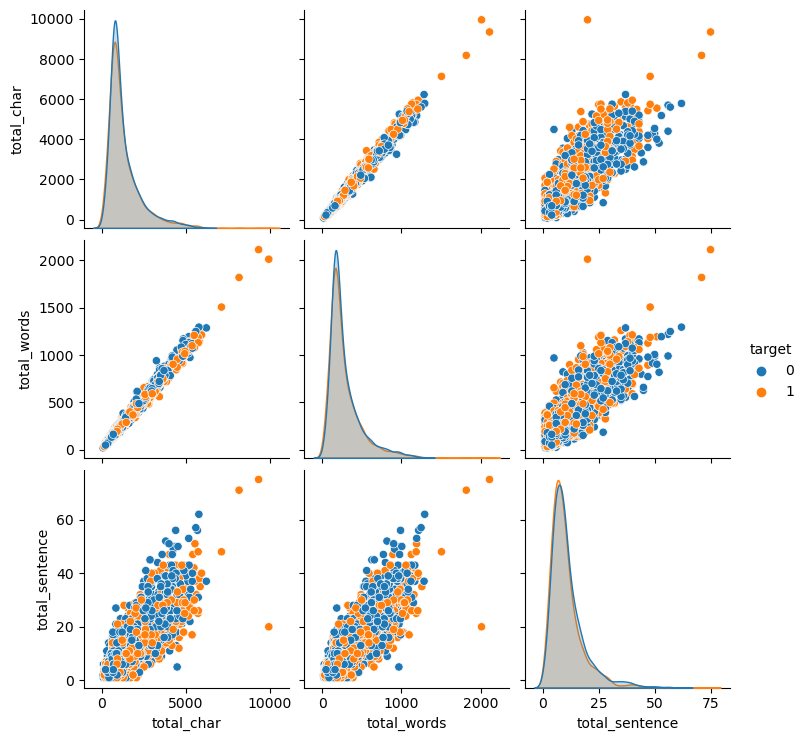

In [26]:
sns.pairplot(df,hue='target')

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

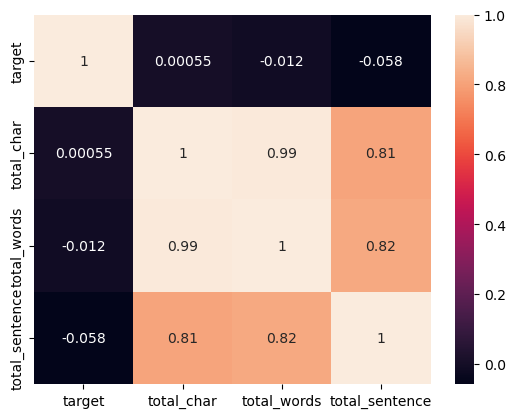

In [27]:
sns.heatmap(df.corr(),annot=True)

## 3.Text Preprocessing
- Lower case
- Tokenization
- Eliminating special characters
- Eliminating stop letters & punctuation
- Stemming

In [28]:
#for stopwords & punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

#for stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#creating a function
def transform(text):
    text=text.lower()                                   #converting into lowercase
    text=nltk.word_tokenize(text)                       #converting into tokens
    
    new=[]             
    for i in text:                                      #eliminating special characters
        if i.isalnum():
            new.append(i)
    
    text=new[:]                                         #cloning the data becoz list is mutable
    new.clear()
    for i in text:                                      #eliminating stopletters & punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            new.append(i)
            
    text=new[:]
    new.clear()
    for i in text:
        new.append(ps.stem(i))
        
    return " ".join(new)

In [30]:
df['transformed']=df['text'].apply(transform)

C:\Users\ASHU\AppData\Local\Temp\ipykernel_1916\1433238750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed']=df['text'].apply(transform)


In [31]:
df

,text,target,total_char,total_words,total_sentence,transformed
0,One of the other reviewers has mentioned that ...,1,1761,380,10,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,998,201,7,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,926,205,4,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,6,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9,petter mattei love time money visual stun film...
...,...,...,...,...,...,...
4995,An interesting slasher film with multiple susp...,0,689,161,4,interest slasher film multipl br br includ typ...
4996,i watched this series when it first came out i...,1,1862,366,2,watch seri first came 14 year old watch best f...
4997,Once again Jet Li brings his charismatic prese...,1,1457,287,10,jet li bring charismat presenc movi screen fil...
4998,"I rented this movie, after hearing Chris Gore ...",0,3424,720,31,rent movi hear chri gore say someth effect fiv...


In [32]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from wordcloud import WordCloud                           #Highlight the important word
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
positive_review=wc.generate(df[df['target']==1]['transformed'].str.cat(sep=''))

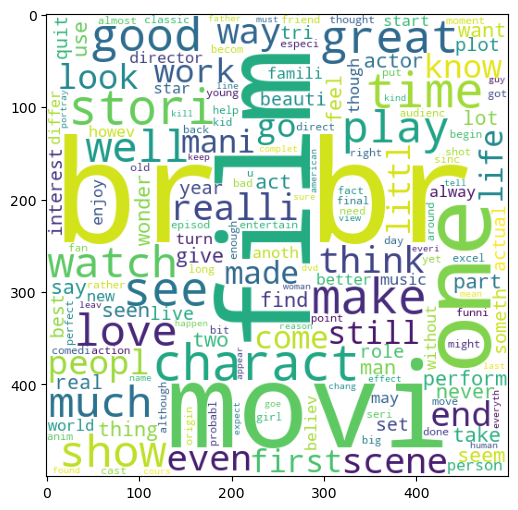

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(positive_review)

In [36]:
negative_review=wc.generate(df[df['target']==0]['transformed'].str.cat(sep=''))

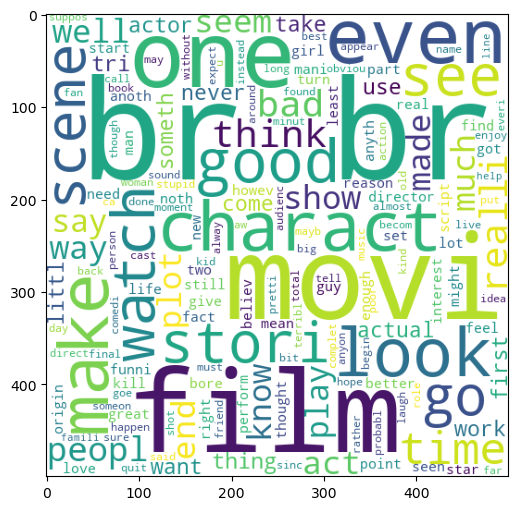

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(negative_review)

In [38]:
negative_words=[]                                                   #creating a list of negative words
for msg in df[df['target']==0]['transformed'].tolist():
    for words in msg.split():
        negative_words.append(words)

In [39]:
len(negative_words)

299380

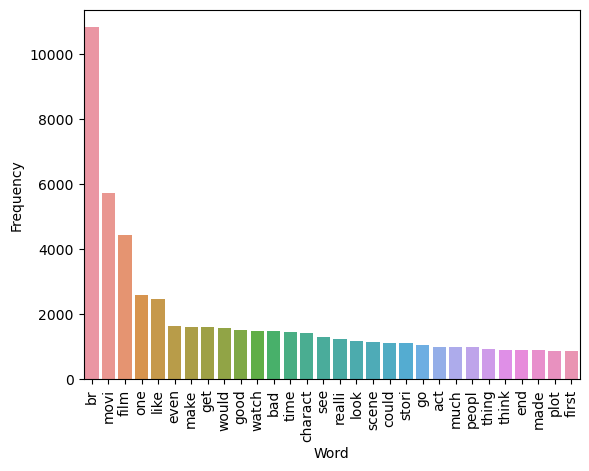

In [40]:
from collections import Counter
# Assuming negative _words_corpus is a list of strings
negative_words_counter = Counter(negative_words)
top_30_words = dict(negative_words_counter.most_common(30))

# Create a DataFrame from the top 30 words
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_top_30_words)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
positive_words=[]                                                   #creating a list of negative words
for msg in df[df['target']==1]['transformed'].tolist():
    for words in msg.split():
        positive_words.append(words)

In [42]:
len(positive_words)

292740

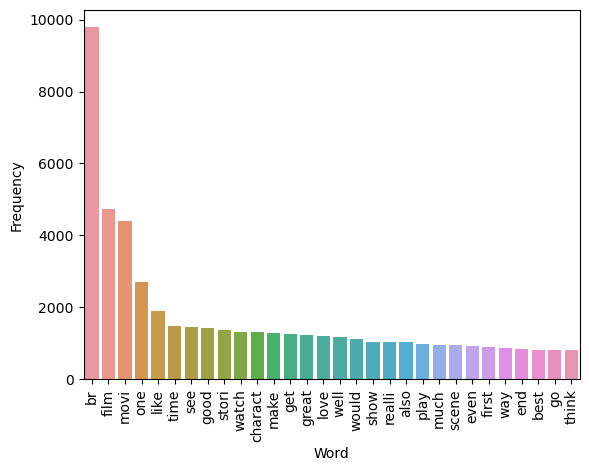

In [43]:
# Assuming positive _words_corpus is a list of strings
positive_words_counter = Counter(positive_words)
top_30_words = dict(positive_words_counter.most_common(30))

# Create a DataFrame from the top 30 words
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_top_30_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building
- Converting text to numbers(text vectorization)
- Using bag of words

In [44]:
#these libraries used for converting a collection of texts documents into tokens or frequency
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [45]:
#converting sparse array to dense array
x=tfidf.fit_transform(df['transformed']).toarray()

In [46]:
#appending the total_words columns to x
#x=np.hstack((x,df['total_words'].values.reshape(-1,1)))

In [47]:
y=df['target'].values
y

array([1, 1, 1, ..., 1, 0, 0])

In [48]:
#importing train_test_split for splitting the data into train data and test data
from sklearn.model_selection import train_test_split
#size of test data is 20% of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [50]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.587
[[308 192]
 [221 279]]
0.5923566878980892


In [51]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.842
[[460  40]
 [118 382]]
0.9052132701421801


In [52]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.833
[[441  59]
 [108 392]]
0.8691796008869179


#### Here we are going to choose Tfidf --> (Multinomial NB) becoz it gives best precision score & accuracy score among all.

#### Improving model performance
- Checking the changing of max_features parameter of Tfidf (max_features = number of unique words).
- Checking the minmaxscaler for x_train.
- Appending the created column(total_words) in x (result- precision score is increasing but accuracy score is decreasing),so we will not append the column in x_train.

#### We are not going to change anything in the model because our model giving best results without making any change. 

In [53]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))